# Visualization Dashboard Notebook
# Overview
This notebook creates interactive dashboards and visualizations for anomaly detection results.
# Dashboard Components:
1. Executive Summary Dashboard: Key metrics and KPIs
2. Risk Distribution Analysis: Visualizing risk scores and categories
3. Customer Segmentation Analysis: Understanding different customer groups
4. Geographic Analysis: Location-based risk visualization
5. Temporal Analysis: Risk trends over time
6. Feature Importance Analysis: Understanding what drives risk scores
7. Interactive Customer Explorer: Drill-down into individual customers
8. Alert Management Dashboard: For investigation teams

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Interactive widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, HTML

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# For better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load anomaly detection results
try:
    # Load comprehensive results
    df_results = pd.read_csv('../data/outputs/anomaly_results/comprehensive_anomaly_results.csv')
    print(f"✅ Comprehensive results loaded! Shape: {df_results.shape}")
    
    # Load high-risk customers
    df_high_risk = pd.read_csv('../data/outputs/anomaly_results/high_risk_customers.csv')
    print(f"✅ High-risk customers loaded! Shape: {df_high_risk.shape}")
    
    # Load visualization data
    df_viz = pd.read_csv('../data/outputs/anomaly_results/visualization_data.csv')
    print(f"✅ Visualization data loaded! Shape: {df_viz.shape}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    print("⚠️ Please run anomaly detection notebook first!")
    raise

✅ Comprehensive results loaded! Shape: (3893, 15)
✅ High-risk customers loaded! Shape: (1078, 7)
✅ Visualization data loaded! Shape: (3893, 7)


In [3]:
# Display data information
print("\n📊 DATASET OVERVIEW")
print("="*60)

print(f"Total customers analyzed: {len(df_results):,}")
print(f"High/Critical risk customers: {len(df_high_risk):,}")
print(f"Columns in comprehensive results: {len(df_results.columns)}")
print(f"Columns in high-risk data: {len(df_high_risk.columns)}")

print("\n📋 First 3 rows of comprehensive results:")
display(df_results.head(3))

print("\n📋 First 3 rows of high-risk customers:")
display(df_high_risk.head(3))


📊 DATASET OVERVIEW
Total customers analyzed: 3,893
High/Critical risk customers: 1,078
Columns in comprehensive results: 15
Columns in high-risk data: 7

📋 First 3 rows of comprehensive results:


,Z_Score,IQR,Isolation_Forest,LOF,OneClass_SVM,Account_Number,Vote_Count,Vote_Ratio,Weighted_Score,Consensus_Anomaly,Segment_Code,Segment_Name,Risk_Score_Raw,Risk_Score_Final,Risk_Category
0,1,1,1,1,1,2126250020860465,5,1.0000,1.0000,1,0,Cluster 1,1.0000,1.0000,Critical Risk
1,1,1,1,0,1,2126316108175240,4,0.8000,0.7857,1,0,Cluster 1,0.7857,1.0000,Critical Risk
2,1,1,1,0,1,4231398885235240,4,0.8000,0.7857,1,0,Cluster 1,0.7857,1.0000,Critical Risk



📋 First 3 rows of high-risk customers:


,Account_Number,Risk_Score_Final,Risk_Category,Investigation_Priority,Vote_Ratio,Consensus_Anomaly,Segment_Name
0,2126250020860465,1.0000,Critical Risk,Immediate,1.0000,1,Cluster 1
1,2126316108175240,1.0000,Critical Risk,Immediate,0.8000,1,Cluster 1
2,4231398885235240,1.0000,Critical Risk,Immediate,0.8000,1,Cluster 1


# 2.1 Create Executive Summary Dashboard
Key metrics and KPIs at a glance.

In [4]:
print("📊 CREATING EXECUTIVE SUMMARY DASHBOARD")
print("="*60)

# Calculate key metrics
total_customers = len(df_results)
high_critical_risk = len(df_high_risk)
consensus_anomalies = df_results['Consensus_Anomaly'].sum()
avg_risk_score = df_results['Risk_Score_Final'].mean()
median_risk_score = df_results['Risk_Score_Final'].median()

# Risk category breakdown
risk_category_counts = df_results['Risk_Category'].value_counts()
low_risk = risk_category_counts.get('Low Risk', 0)
medium_risk = risk_category_counts.get('Medium Risk', 0)
high_risk = risk_category_counts.get('High Risk', 0)
critical_risk = risk_category_counts.get('Critical Risk', 0)

# Calculate percentages
high_critical_pct = high_critical_risk / total_customers * 100
consensus_anomalies_pct = consensus_anomalies / total_customers * 100

print("📈 KEY METRICS:")
print(f"   • Total Customers Analyzed: {total_customers:,}")
print(f"   • High/Critical Risk Customers: {high_critical_risk:,} ({high_critical_pct:.1f}%)")
print(f"   • Consensus Anomalies: {consensus_anomalies:,} ({consensus_anomalies_pct:.1f}%)")
print(f"   • Average Risk Score: {avg_risk_score:.3f}")
print(f"   • Median Risk Score: {median_risk_score:.3f}")

print("\n🎯 RISK CATEGORY BREAKDOWN:")
for category, count in risk_category_counts.items():
    pct = count / total_customers * 100
    print(f"   • {category:15s}: {count:6,} ({pct:5.1f}%)")

📊 CREATING EXECUTIVE SUMMARY DASHBOARD
📈 KEY METRICS:
   • Total Customers Analyzed: 3,893
   • High/Critical Risk Customers: 1,078 (27.7%)
   • Consensus Anomalies: 1,186 (30.5%)
   • Average Risk Score: 0.434
   • Median Risk Score: 0.340

🎯 RISK CATEGORY BREAKDOWN:
   • Medium Risk    :  1,769 ( 45.4%)
   • Low Risk       :  1,046 ( 26.9%)
   • High Risk      :    611 ( 15.7%)
   • Critical Risk  :    467 ( 12.0%)


In [5]:
# Create executive summary visualization
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Risk Category Distribution', 
                    'Risk Score Distribution',
                    'High Risk Customers by Priority',
                    'Consensus Anomaly Detection',
                    'Risk Score vs Transaction Volume',
                    'Customer Segmentation'),
    specs=[[{'type': 'pie'}, {'type': 'histogram'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'scatter'}, {'type': 'pie'}]],
    vertical_spacing=0.15,
    horizontal_spacing=0.1
)

# Plot 1: Risk Category Distribution (Pie Chart)
fig.add_trace(
    go.Pie(
        labels=risk_category_counts.index,
        values=risk_category_counts.values,
        hole=0.4,
        marker_colors=['#00CC96', '#FFA15A', '#EF553B', '#AB63FA'],
        textinfo='label+percent',
        textposition='inside',
        showlegend=False
    ),
    row=1, col=1
)

# Plot 2: Risk Score Distribution (Histogram)
fig.add_trace(
    go.Histogram(
        x=df_results['Risk_Score_Final'],
        nbinsx=30,
        marker_color='#636EFA',
        opacity=0.7,
        name='Risk Score'
    ),
    row=1, col=2
)

# Add vertical lines for thresholds to the histogram ONLY
# Use add_shape instead of add_vline for more control
thresholds = [0.3, 0.6, 0.8]
colors = ['green', 'orange', 'red']
labels = ['Low Risk', 'Medium Risk', 'High Risk']

for threshold, color, label in zip(thresholds, colors, labels):
    fig.add_shape(
        type="line",
        x0=threshold, x1=threshold, y0=0, y1=1,
        line=dict(color=color, width=2, dash="dash"),
        xref="x2", yref="y2 domain",  # Note: xref and yref specify the subplot
        row=1, col=2
    )
    
# Add annotations for thresholds
fig.add_annotation(
    x=0.15, y=0.9,
    text="Low Risk",
    showarrow=False,
    font=dict(color="green", size=10),
    xref="x2", yref="y2 domain",
    row=1, col=2
)
fig.add_annotation(
    x=0.45, y=0.9,
    text="Medium Risk",
    showarrow=False,
    font=dict(color="orange", size=10),
    xref="x2", yref="y2 domain",
    row=1, col=2
)
fig.add_annotation(
    x=0.7, y=0.9,
    text="High Risk",
    showarrow=False,
    font=dict(color="red", size=10),
    xref="x2", yref="y2 domain",
    row=1, col=2
)
fig.add_annotation(
    x=0.9, y=0.9,
    text="Critical",
    showarrow=False,
    font=dict(color="darkred", size=10),
    xref="x2", yref="y2 domain",
    row=1, col=2
)

# Plot 3: High Risk Customers by Priority (Bar Chart)
if 'Investigation_Priority' in df_high_risk.columns:
    priority_counts = df_high_risk['Investigation_Priority'].value_counts()
    fig.add_trace(
        go.Bar(
            x=priority_counts.index,
            y=priority_counts.values,
            marker_color=['#EF553B', '#FFA15A', '#00CC96'],
            text=priority_counts.values,
            textposition='auto',
        ),
        row=1, col=3
    )

# Plot 4: Consensus Anomaly Detection (Bar Chart)
anomaly_counts = df_results['Consensus_Anomaly'].value_counts()
fig.add_trace(
    go.Bar(
        x=['Normal', 'Anomaly'],
        y=anomaly_counts.values,
        marker_color=['#00CC96', '#EF553B'],
        text=[f"{anomaly_counts.get(0, 0):,}", f"{anomaly_counts.get(1, 0):,}"],
        textposition='auto',
    ),
    row=2, col=1
)

# Plot 5: Risk Score vs Transaction Volume (Scatter Plot)
if 'Transaction_Frequency' in df_results.columns:
    fig.add_trace(
        go.Scatter(
            x=df_results['Transaction_Frequency'],
            y=df_results['Risk_Score_Final'],
            mode='markers',
            marker=dict(
                size=5,
                color=df_results['Risk_Score_Final'],
                colorscale='RdYlGn_r',  # Red to Green (reversed)
                showscale=True,
                colorbar=dict(title="Risk Score")
            ),
            text=df_results['Account_Number'],
            hoverinfo='text+x+y',
            name='Customers'
        ),
        row=2, col=2
    )
    
    fig.update_xaxes(title_text="Transaction Frequency", row=2, col=2)
    fig.update_yaxes(title_text="Risk Score", row=2, col=2)

# Plot 6: Customer Segmentation (Pie Chart)
if 'Segment_Name' in df_results.columns:
    segment_counts = df_results['Segment_Name'].value_counts().head(8)  # Top 8 segments
    fig.add_trace(
        go.Pie(
            labels=segment_counts.index,
            values=segment_counts.values,
            hole=0.3,
            textinfo='label+percent',
            textposition='inside',
            showlegend=False
        ),
        row=2, col=3
    )

# Update layout
fig.update_layout(
    height=900,
    showlegend=False,
    title_text="Executive Summary Dashboard",
    title_font_size=24,
    title_x=0.5
)

# Update axes labels
fig.update_xaxes(title_text="Priority Level", row=1, col=3)
fig.update_yaxes(title_text="Count", row=1, col=3)
fig.update_xaxes(title_text="Category", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

fig.show()

# 3.1 Detailed Risk Analysis
In-depth analysis of risk distribution and patterns.

In [6]:
print("\n📊 DETAILED RISK DISTRIBUTION ANALYSIS")
print("="*60)

# Create comprehensive risk analysis dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Risk Score Distribution by Category',
                    'Cumulative Risk Distribution',
                    'Risk Score Box Plot by Segment',
                    'Risk vs Multiple Detection Methods'),
    specs=[[{'type': 'violin'}, {'type': 'scatter'}],
           [{'type': 'box'}, {'type': 'scatter'}]],
    vertical_spacing=0.15,
    horizontal_spacing=0.15
)

# Plot 1: Risk Score Distribution by Category (Violin Plot)
for i, category in enumerate(['Low Risk', 'Medium Risk', 'High Risk', 'Critical Risk']):
    if category in df_results['Risk_Category'].unique():
        category_data = df_results[df_results['Risk_Category'] == category]['Risk_Score_Final']
        fig.add_trace(
            go.Violin(
                y=category_data,
                name=category,
                box_visible=True,
                meanline_visible=True,
                fillcolor='lightseagreen' if category == 'Low Risk' else 
                        'orange' if category == 'Medium Risk' else
                        'red' if category == 'High Risk' else 'darkred',
                line_color='black',
                opacity=0.7
            ),
            row=1, col=1
        )

fig.update_yaxes(title_text="Risk Score", row=1, col=1)

# Plot 2: Cumulative Risk Distribution
sorted_scores = np.sort(df_results['Risk_Score_Final'])
cumulative_dist = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)

fig.add_trace(
    go.Scatter(
        x=sorted_scores,
        y=cumulative_dist * 100,
        mode='lines',
        line=dict(color='#636EFA', width=3),
        fill='tozeroy',
        fillcolor='rgba(99, 110, 250, 0.3)',
        name='Cumulative Distribution'
    ),
    row=1, col=2
)

# Add percentile lines
percentiles = [25, 50, 75, 90, 95]
percentile_values = np.percentile(df_results['Risk_Score_Final'], percentiles)

for pct, val in zip(percentiles, percentile_values):
    fig.add_shape(
        type="line",
        x0=val, x1=val,
        y0=0, y1=100,
        line=dict(color="red", width=1, dash="dash"),
        row=1, col=2
    )
    fig.add_annotation(
        x=val, y=pct,
        text=f"{pct}%: {val:.3f}",
        showarrow=False,
        font=dict(size=10),
        row=1, col=2
    )

fig.update_xaxes(title_text="Risk Score", row=1, col=2)
fig.update_yaxes(title_text="Cumulative Percentage (%)", row=1, col=2)

# Plot 3: Risk Score Box Plot by Segment
if 'Segment_Name' in df_results.columns:
    # Get top 5 segments by count
    top_segments = df_results['Segment_Name'].value_counts().head(5).index
    
    for segment in top_segments:
        segment_data = df_results[df_results['Segment_Name'] == segment]['Risk_Score_Final']
        fig.add_trace(
            go.Box(
                y=segment_data,
                name=segment[:20],  # Truncate long names
                boxpoints='outliers',
                marker_color='lightcoral',
                line_color='darkred'
            ),
            row=2, col=1
        )
    
    fig.update_yaxes(title_text="Risk Score", row=2, col=1)
    fig.update_xaxes(title_text="Customer Segment", row=2, col=1)

# Plot 4: Risk vs Multiple Detection Methods
if all(col in df_results.columns for col in ['Z_Score', 'IQR', 'Isolation_Forest', 'LOF']):
    # Calculate agreement score
    df_results['Method_Agreement'] = df_results[['Z_Score', 'IQR', 'Isolation_Forest', 'LOF']].sum(axis=1)
    
    fig.add_trace(
        go.Scatter(
            x=df_results['Method_Agreement'],
            y=df_results['Risk_Score_Final'],
            mode='markers',
            marker=dict(
                size=8,
                color=df_results['Risk_Score_Final'],
                colorscale='RdYlGn_r',
                showscale=True,
                colorbar=dict(title="Risk Score")
            ),
            text=df_results.apply(
                lambda row: f"Account: {row['Account_Number']}<br>" +
                           f"Methods: {row['Method_Agreement']}/4<br>" +
                           f"Risk: {row['Risk_Score_Final']:.3f}",
                axis=1
            ),
            hoverinfo='text',
            name='Customers'
        ),
        row=2, col=2
    )
    
    fig.update_xaxes(title_text="Number of Methods Flagging Anomaly", row=2, col=2)
    fig.update_yaxes(title_text="Risk Score", row=2, col=2)

# Update layout
fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Detailed Risk Distribution Analysis",
    title_font_size=20,
    title_x=0.5
)

fig.show()


📊 DETAILED RISK DISTRIBUTION ANALYSIS


# 4.1 Customer Segmentation Dashboard
Analyze risk across different customer segments.


👥 CUSTOMER SEGMENTATION ANALYSIS
✅ Segmentation data available: 3 segments
Available columns in df_results:
['Z_Score', 'IQR', 'Isolation_Forest', 'LOF', 'OneClass_SVM', 'Account_Number', 'Vote_Count', 'Vote_Ratio', 'Weighted_Score', 'Consensus_Anomaly', 'Segment_Code', 'Segment_Name', 'Risk_Score_Raw', 'Risk_Score_Final', 'Risk_Category', 'Method_Agreement']

Transaction frequency columns: []
Transaction amount columns: []

📊 Segment Statistics Summary:
Total segments: 3

📊 Top 5 Riskiest Segments:


,Customer_Count,Avg_Risk_Score,Std_Risk_Score,Min_Risk_Score,Max_Risk_Score,Anomaly_Rate,P75_Risk_Score
Segment_Name,,,,,,,
Cluster 2,3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000
Cluster 3,15,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000
Cluster 1,3875,0.4310,0.2610,0.1440,1.0000,0.3010,0.6050



📊 Top 5 Safest Segments:


,Customer_Count,Avg_Risk_Score,Std_Risk_Score,Min_Risk_Score,Max_Risk_Score,Anomaly_Rate,P75_Risk_Score
Segment_Name,,,,,,,
Cluster 2,3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000
Cluster 3,15,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000
Cluster 1,3875,0.4310,0.2610,0.1440,1.0000,0.3010,0.6050



📈 Overall Statistics:
Total customers: 3893
Overall anomaly rate: 30.46%


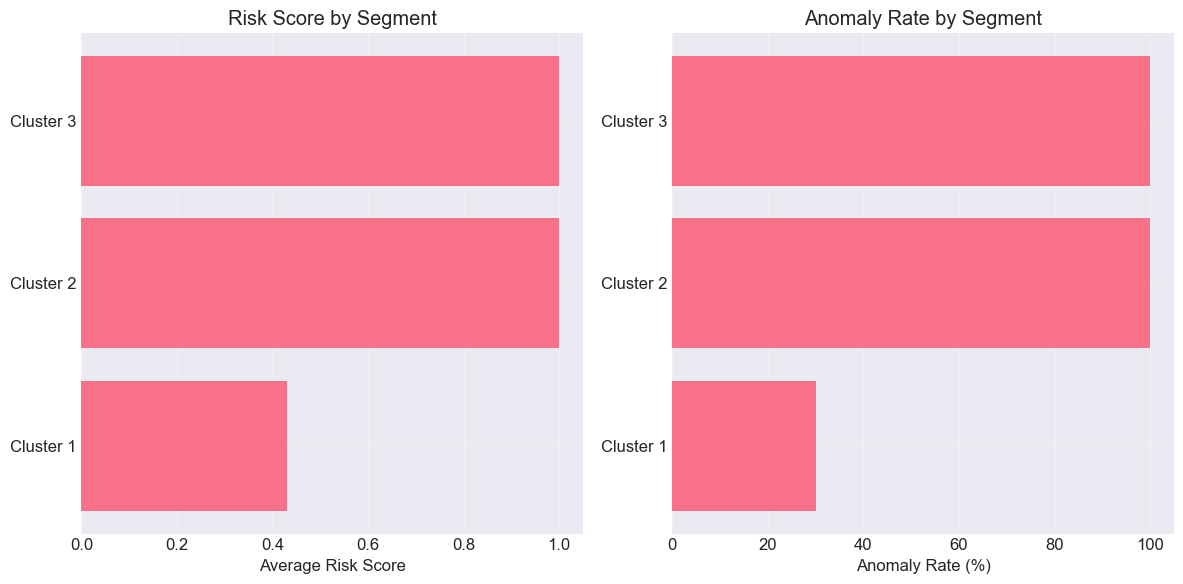

In [7]:
print("\n👥 CUSTOMER SEGMENTATION ANALYSIS")
print("="*60)

# Check if segmentation data is available
if 'Segment_Name' in df_results.columns:
    print(f"✅ Segmentation data available: {df_results['Segment_Name'].nunique()} segments")
    
    # First, let's check what columns are actually available
    print("Available columns in df_results:")
    print(df_results.columns.tolist()[:20])  # Show first 20 columns
    
    # Check for transaction frequency columns
    freq_columns = [col for col in df_results.columns if 'freq' in col.lower() or 'transaction_freq' in col.lower()]
    print(f"\nTransaction frequency columns: {freq_columns}")
    
    # Check for transaction amount columns
    amount_columns = [col for col in df_results.columns if 'amount' in col.lower()]
    print(f"Transaction amount columns: {amount_columns[:10]}")  # Show first 10
    
    # SIMPLIFIED APPROACH: Use only the essential columns that we know exist
    agg_dict = {
        'Account_Number': 'count',
        'Risk_Score_Final': ['mean', 'std', 'min', 'max'],
        'Consensus_Anomaly': 'mean'
    }
    
    # Calculate segment statistics
    segment_stats = df_results.groupby('Segment_Name').agg(agg_dict).round(3)
    
    # Flatten column names - simpler approach
    segment_stats.columns = ['_'.join(col).strip() for col in segment_stats.columns.values]
    
    # Rename columns for clarity
    rename_dict = {
        'Account_Number_count': 'Customer_Count',
        'Risk_Score_Final_mean': 'Avg_Risk_Score',
        'Risk_Score_Final_std': 'Std_Risk_Score', 
        'Risk_Score_Final_min': 'Min_Risk_Score',
        'Risk_Score_Final_max': 'Max_Risk_Score',
        'Consensus_Anomaly_mean': 'Anomaly_Rate'
    }
    
    segment_stats = segment_stats.rename(columns=rename_dict)
    
    # Add P75 calculation separately
    p75_by_segment = df_results.groupby('Segment_Name')['Risk_Score_Final'].apply(lambda x: np.percentile(x, 75)).round(3)
    segment_stats['P75_Risk_Score'] = p75_by_segment
    
    # Sort by average risk score
    segment_stats = segment_stats.sort_values('Avg_Risk_Score', ascending=False)
    
    print(f"\n📊 Segment Statistics Summary:")
    print(f"Total segments: {len(segment_stats)}")
    
    print(f"\n📊 Top 5 Riskiest Segments:")
    display(segment_stats.head(5))
    
    print(f"\n📊 Top 5 Safest Segments:")
    display(segment_stats.tail(5))
    
    # Also show overall statistics
    print(f"\n📈 Overall Statistics:")
    print(f"Total customers: {segment_stats['Customer_Count'].sum()}")
    print(f"Overall anomaly rate: {(df_results['Consensus_Score'].mean() * 100):.2f}%" if 'Consensus_Score' in df_results.columns else f"Overall anomaly rate: {(df_results['Consensus_Anomaly'].mean() * 100):.2f}%")
    
    # Create a visualization of segment risk distribution
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        plt.figure(figsize=(12, 6))
        
        # Bar plot of average risk by segment
        plt.subplot(1, 2, 1)
        segment_stats_sorted = segment_stats.sort_values('Avg_Risk_Score', ascending=True)
        plt.barh(range(len(segment_stats_sorted)), segment_stats_sorted['Avg_Risk_Score'])
        plt.yticks(range(len(segment_stats_sorted)), segment_stats_sorted.index)
        plt.xlabel('Average Risk Score')
        plt.title('Risk Score by Segment')
        plt.grid(True, alpha=0.3)
        
        # Bar plot of anomaly rate by segment
        plt.subplot(1, 2, 2)
        segment_stats_sorted = segment_stats.sort_values('Anomaly_Rate', ascending=True)
        plt.barh(range(len(segment_stats_sorted)), segment_stats_sorted['Anomaly_Rate'] * 100)
        plt.yticks(range(len(segment_stats_sorted)), segment_stats_sorted.index)
        plt.xlabel('Anomaly Rate (%)')
        plt.title('Anomaly Rate by Segment')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except ImportError:
        print("⚠️ Matplotlib/Seaborn not available for visualization")
    
else:
    print("⚠️ No segmentation data found. Creating synthetic segments for visualization...")
    
    # Create synthetic segments based on risk scores
    df_results['Segment_Synthetic'] = pd.qcut(df_results['Risk_Score_Final'], 
                                              q=5, 
                                              labels=['Very Low Risk', 'Low Risk', 
                                                      'Medium Risk', 'High Risk', 
                                                      'Very High Risk'])
    
    # Use synthetic segments for analysis
    df_results['Segment_Name'] = df_results['Segment_Synthetic']
    
    print(f"✅ Created synthetic segments: {df_results['Segment_Name'].nunique()} segments")
    
    # Now calculate statistics with synthetic segments
    agg_dict = {
        'Account_Number': 'count',
        'Risk_Score_Final': ['mean', 'std', 'min', 'max'],
        'Consensus_Anomaly': 'mean'
    }
    
    segment_stats = df_results.groupby('Segment_Name').agg(agg_dict).round(3)
    
    # Flatten column names
    segment_stats.columns = ['_'.join(col).strip() for col in segment_stats.columns.values]
    
    # Rename columns
    rename_dict = {
        'Account_Number_count': 'Customer_Count',
        'Risk_Score_Final_mean': 'Avg_Risk_Score',
        'Risk_Score_Final_std': 'Std_Risk_Score', 
        'Risk_Score_Final_min': 'Min_Risk_Score',
        'Risk_Score_Final_max': 'Max_Risk_Score',
        'Consensus_Anomaly_mean': 'Anomaly_Rate'
    }
    
    segment_stats = segment_stats.rename(columns=rename_dict)
    
    # Add P75
    p75_by_segment = df_results.groupby('Segment_Name')['Risk_Score_Final'].apply(lambda x: np.percentile(x, 75)).round(3)
    segment_stats['P75_Risk_Score'] = p75_by_segment
    
    # Sort
    segment_stats = segment_stats.sort_values('Avg_Risk_Score', ascending=False)
    
    print(f"\n📊 Synthetic Segment Statistics:")
    display(segment_stats)
    
    print(f"\n📈 Overall Statistics:")
    print(f"Total customers: {segment_stats['Customer_Count'].sum()}")
    print(f"Overall anomaly rate: {(df_results['Consensus_Anomaly'].mean() * 100):.2f}%")

In [ ]:
# Create segmentation dashboard
if 'Segment_Name' in df_results.columns:
    # Prepare data for visualization
    segment_summary = df_results.groupby('Segment_Name').agg({
        'Account_Number': 'count',
        'Risk_Score_Final': 'mean',
        'Consensus_Anomaly': 'mean'
    }).reset_index()
    
    segment_summary.columns = ['Segment', 'Customer_Count', 'Avg_Risk_Score', 'Anomaly_Rate']
    segment_summary = segment_summary.sort_values('Avg_Risk_Score', ascending=False)
    
    # Create visualization
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Risk Score by Segment',
                        'Customer Distribution by Segment',
                        'Anomaly Rate by Segment',
                        'Segment Risk Profile Matrix'),
        specs=[[{'type': 'bar'}, {'type': 'pie'}],
               [{'type': 'bar'}, {'type': 'scatter'}]],
        vertical_spacing=0.15,
        horizontal_spacing=0.15
    )
    
    # Plot 1: Risk Score by Segment (Bar Chart)
    # Create color scale based on risk scores
    risk_scores = segment_summary['Avg_Risk_Score'].values
    # Normalize risk scores to 0-1 range for color mapping
    norm_risk = (risk_scores - risk_scores.min()) / (risk_scores.max() - risk_scores.min() + 1e-10)
    # Generate colors using RdYlGn color scale (reversed: red for high risk)
    colors = px.colors.sample_colorscale('RdYlGn', norm_risk, low=0.0, high=1.0, colortype='rgb')
    
    fig.add_trace(
        go.Bar(
            x=segment_summary['Segment'],
            y=segment_summary['Avg_Risk_Score'],
            marker=dict(
                color=colors,
                line=dict(color='rgba(0,0,0,0.5)', width=1)
            ),
            text=segment_summary['Avg_Risk_Score'].round(3),
            textposition='auto',
            name='Avg Risk Score',
            hovertemplate='Segment: %{x}<br>Risk Score: %{y:.3f}<extra></extra>'
        ),
        row=1, col=1
    )
    
    fig.update_xaxes(title_text="Segment", row=1, col=1, tickangle=45)
    fig.update_yaxes(title_text="Average Risk Score", row=1, col=1)
    
    # Plot 2: Customer Distribution by Segment (Pie Chart)
    fig.add_trace(
        go.Pie(
            labels=segment_summary['Segment'],
            values=segment_summary['Customer_Count'],
            hole=0.4,
            textinfo='label+percent',
            textposition='inside',
            showlegend=False,
            marker=dict(colors=px.colors.qualitative.Set3),
            hovertemplate='Segment: %{label}<br>Customers: %{value}<br>Percentage: %{percent}<extra></extra>'
        ),
        row=1, col=2
    )
    
    # Plot 3: Anomaly Rate by Segment (Bar Chart)
    fig.add_trace(
        go.Bar(
            x=segment_summary['Segment'],
            y=segment_summary['Anomaly_Rate'] * 100,
            marker=dict(
                color='coral',
                line=dict(color='rgba(0,0,0,0.5)', width=1)
            ),
            text=[f"{rate*100:.1f}%" for rate in segment_summary['Anomaly_Rate']],
            textposition='auto',
            name='Anomaly Rate',
            hovertemplate='Segment: %{x}<br>Anomaly Rate: %{y:.1f}%<extra></extra>'
        ),
        row=2, col=1
    )
    
    fig.update_xaxes(title_text="Segment", row=2, col=1, tickangle=45)
    fig.update_yaxes(title_text="Anomaly Rate (%)", row=2, col=1)
    
    # Plot 4: Segment Risk Profile Matrix (Scatter Plot)
    # First, check what columns we actually have available
    available_columns = df_results.columns.tolist()
    print("Available columns for scatter plot:")
    print([col for col in available_columns if 'freq' in col.lower() or 'amount' in col.lower()])
    
    # Try to find transaction frequency and amount columns
    freq_cols = [col for col in available_columns if 'freq' in col.lower() or 'count' in col.lower()]
    amount_cols = [col for col in available_columns if 'amount' in col.lower() and 'avg' in col.lower()]
    
    if freq_cols and amount_cols:
        # Use the first matching columns
        freq_col = freq_cols[0]
        amount_col = amount_cols[0]
        
        segment_agg = df_results.groupby('Segment_Name').agg({
            freq_col: 'mean',
            amount_col: 'mean',
            'Risk_Score_Final': 'mean',
            'Account_Number': 'count'
        }).reset_index()
        
        # Create bubble sizes based on risk score
        bubble_sizes = (segment_agg['Risk_Score_Final'] - segment_agg['Risk_Score_Final'].min() + 0.1) * 50
        
        fig.add_trace(
            go.Scatter(
                x=segment_agg[freq_col],
                y=segment_agg[amount_col],
                mode='markers+text',
                marker=dict(
                    size=bubble_sizes,
                    color=segment_agg['Risk_Score_Final'],
                    colorscale='RdYlGn_r',
                    showscale=True,
                    colorbar=dict(title="Risk Score", x=1.02),
                    line=dict(width=2, color='DarkSlateGrey')
                ),
                text=segment_agg['Segment_Name'],
                textposition="top center",
                hoverinfo='text',
                hovertext=segment_agg.apply(
                    lambda row: f"Segment: {row['Segment_Name']}<br>" +
                               f"Customers: {row['Account_Number']}<br>" +
                               f"Risk Score: {row['Risk_Score_Final']:.3f}<br>" +
                               f"Avg {freq_col}: {row[freq_col]:.1f}<br>" +
                               f"Avg {amount_col}: {row[amount_col]:,.0f}",
                    axis=1
                ),
                name='Segments'
            ),
            row=2, col=2
        )
        
        fig.update_xaxes(title_text=f"Average {freq_col}", row=2, col=2)
        fig.update_yaxes(title_text=f"Average {amount_col}", row=2, col=2)
    else:
        # If we don't have frequency/amount data, create a simple scatter plot with risk scores
        print("⚠️ Transaction frequency/amount columns not found. Creating simplified scatter plot.")
        
        segment_agg = df_results.groupby('Segment_Name').agg({
            'Risk_Score_Final': ['mean', 'std'],
            'Account_Number': 'count'
        }).reset_index()
        
        # Flatten column names
        segment_agg.columns = ['Segment_Name', 'Risk_Mean', 'Risk_Std', 'Customer_Count']
        
        fig.add_trace(
            go.Scatter(
                x=segment_agg['Risk_Mean'],
                y=segment_agg['Risk_Std'],
                mode='markers+text',
                marker=dict(
                    size=segment_agg['Customer_Count'] / segment_agg['Customer_Count'].max() * 100,
                    color=segment_agg['Risk_Mean'],
                    colorscale='RdYlGn_r',
                    showscale=True,
                    colorbar=dict(title="Risk Score", x=1.02),
                    line=dict(width=2, color='DarkSlateGrey')
                ),
                text=segment_agg['Segment_Name'],
                textposition="top center",
                hoverinfo='text',
                hovertext=segment_agg.apply(
                    lambda row: f"Segment: {row['Segment_Name']}<br>" +
                               f"Customers: {row['Customer_Count']}<br>" +
                               f"Avg Risk: {row['Risk_Mean']:.3f}<br>" +
                               f"Risk Std: {row['Risk_Std']:.3f}",
                    axis=1
                ),
                name='Segments'
            ),
            row=2, col=2
        )
        
        fig.update_xaxes(title_text="Average Risk Score", row=2, col=2)
        fig.update_yaxes(title_text="Risk Score Standard Deviation", row=2, col=2)
    
    # Update layout
    fig.update_layout(
        height=900,
        showlegend=False,
        title_text="Customer Segmentation Analysis Dashboard",
        title_font_size=20,
        title_x=0.5,
        plot_bgcolor='rgba(240,240,240,0.8)',
        paper_bgcolor='white'
    )
    
    # Add grid and styling
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.3)')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.3)')
    
    fig.show()
    
    # Also display the data table
    print("\n📊 Segment Summary Data:")
    display(segment_summary.style
            .background_gradient(subset=['Avg_Risk_Score'], cmap='RdYlGn_r')
            .background_gradient(subset=['Anomaly_Rate'], cmap='Reds')
            .format({
                'Avg_Risk_Score': '{:.3f}',
                'Anomaly_Rate': '{:.2%}',
                'Customer_Count': '{:,}'
            }))
    
else:
    print("⚠️ No segmentation data found. Skipping dashboard creation.")

Available columns for scatter plot:
[]
⚠️ Transaction frequency/amount columns not found. Creating simplified scatter plot.



📊 Segment Summary Data:


,Segment,Customer_Count,Avg_Risk_Score,Anomaly_Rate
1,Cluster 2,3,1.000,100.00%
2,Cluster 3,15,1.000,100.00%
0,Cluster 1,"3,875",0.431,30.14%
